In [20]:
#import relevant packages
import csv
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from sklearn import datasets
import scipy.stats as stats
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [21]:
#import the clean dataset
data = pd.read_csv("data_clean.csv", index_col=[0])

In [22]:
#check that it's correct using the shape
data.shape

(16926, 96)

# Data Visualisation
As I am focusing on invesigating how job satisfaction is linked to a number of factors, my visualisation has focused on job satisfaction specifically. 

I've done this in a number of ways. 

Firstly, looking at specific factors that I believe might be an interesting comparison with job satisfaction, such as age, country, job description and salary.

Secondly, looking at specific groups that I believe will be indicative of job satisfaction. These have been feature engineered to a certain degree to line them up to our hypothesis.

We'll also look at how the data is correlated with each other and with job satisfaction as a starting point for the modelling. 

Here I am not removing outliers - questionnaire data can be disregarded as an outlier as it's the answer a person gave. Furthermore, as each individual answers surveys in slightly different ways, retaining the outliers may help improve the model by showing trends as individuals how always answer highly are likely to do so across the board. 


## Specific Elements

### Country

What is the mean job satisfaction in each country and how do they compare to one another?

In [23]:
#groupby data for just job satisfaction and country
data_1 = data.groupby('country')['job_satisfaction'].mean()

In [24]:
#download for tableau visualisation
data_1.to_csv('data_1.csv')

In [25]:
#sort the dataframe by the country with the highest job satisfaction
data_1 = pd.DataFrame(data_1)
data_1 = data_1.sort_values('job_satisfaction', ascending=False)
data_1.head()

,job_satisfaction
country,
Luxembourg,7.693333
Denmark,7.673563
Malta,7.632812
Lithuania,7.514344
Latvia,7.484615


In [26]:
data_12 = data_1.reset_index()

In [27]:
data_12.head()

,country,job_satisfaction
0,Luxembourg,7.693333
1,Denmark,7.673563
2,Malta,7.632812
3,Lithuania,7.514344
4,Latvia,7.484615


In [28]:
data_12.tail()

,country,job_satisfaction
22,Slovakia,6.745387
23,Poland,6.725000
24,Italy,6.718385
25,Ireland,6.564103
26,France,6.548448


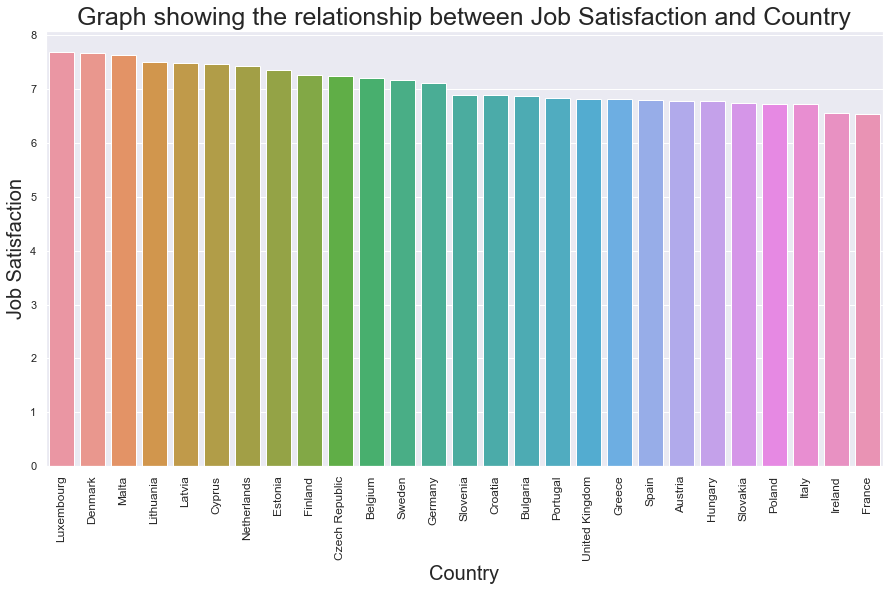

In [29]:
#plot the relationship 
sns.set(rc = {'figure.figsize':(15,8)})

g = sns.barplot(x='country', y='job_satisfaction', data=data_12)
g.axes.set_title("Graph showing the relationship between Job Satisfaction and Country",fontsize=25)
g.set_xlabel("Country",fontsize=20)
g.set_ylabel("Job Satisfaction",fontsize=20)
g.set_xticklabels(g.get_xticklabels(),rotation = 90, fontsize=12);

Luxembourg is the country with the highest job satisfaction at 7.69 whilst France is the lowest at 6.55. 

### Age

What is the job satisfaction of individuals at different ages?

In [30]:
data_3 = data.groupby('age')['job_satisfaction'].mean()

In [31]:
data_3.to_csv('data_3.csv')

In [32]:
data_3 = pd.DataFrame(data_3)
data_3.head()

,job_satisfaction
age,
24,6.922581
25,7.000000
26,6.864362
27,6.890063
28,6.903614


In [33]:
data_3 = data_3.reset_index()

In [34]:
import matplotlib.pyplot as plt

plot the relationship between age and job satisfaction - I've tried a number of different methods here to see whether one shows the relationship better than the others. 

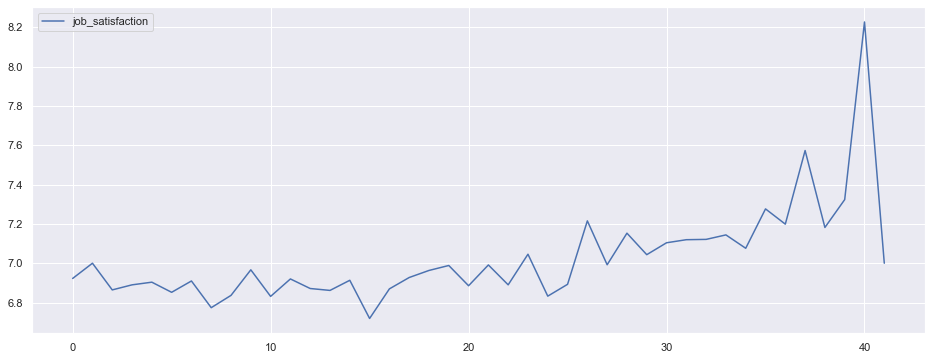

In [35]:
#plotted using matplotlib
data_3[['job_satisfaction']].plot(figsize=(16,6))
plt.show()

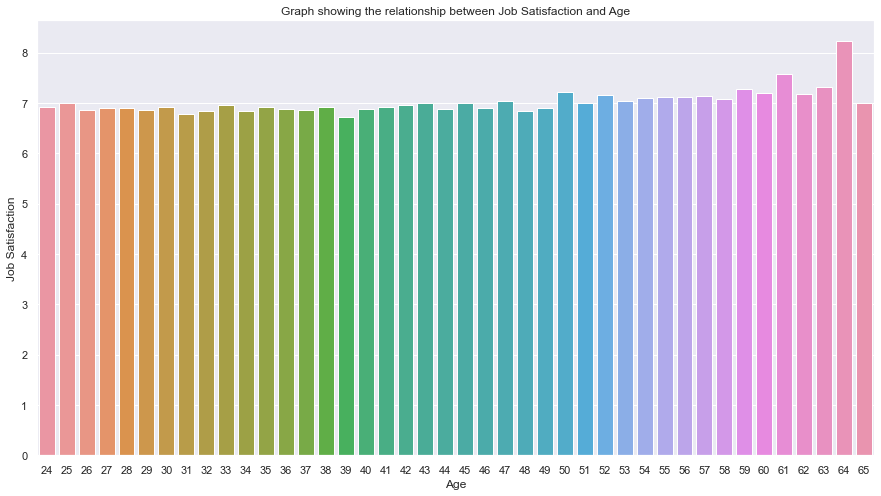

In [36]:
#plotted using seaborn
sns.set(rc = {'figure.figsize':(15,8)})

g = sns.barplot(x='age', y='job_satisfaction', data=data_3)
g.set(xlabel='Age', ylabel='Job Satisfaction', title="Graph showing the relationship between Job Satisfaction and Age");g.set(xlabel='Age', ylabel='Job Satisfaction', title="Graph showing the relationship between Job Satisfaction and Age");

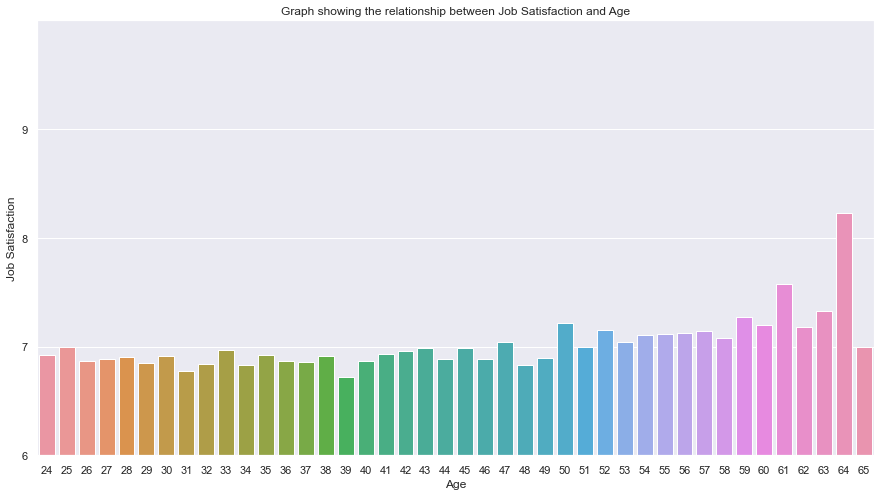

In [37]:
#plotted using seaborn focusing on the y axis between 6 and 9 - where there is more variation
sns.set(rc = {'figure.figsize':(15,8)})

g = sns.barplot(x='age', y='job_satisfaction', data=data_3)
g.set(xlabel='Age', ylabel='Job Satisfaction', title="Graph showing the relationship between Job Satisfaction and Age")
g.set(ylim=(6,10))
ticks = [6,7,8,9]
labels = [i for i in ticks]
g.set(yticks = ticks, yticklabels = labels);

Job satisfaction stays stable until the age of approximately 50 at which point people become more satisfied. There's a spike at aged 64 - perhaps people are looking forward to retiring at that age!

### Gender
What is the mean job satisfaction for each gender and how do they compare to one another?

In [38]:
#group job satisfaction and gender together
data_4 = data.groupby('gender')['job_satisfaction'].mean()

In [39]:
#put them into a dataframe
data_4 = pd.DataFrame(data_4)
data_4.head()

,job_satisfaction
gender,
1,6.931734
2,6.979152


In [40]:
data_4 = data_4.reset_index()

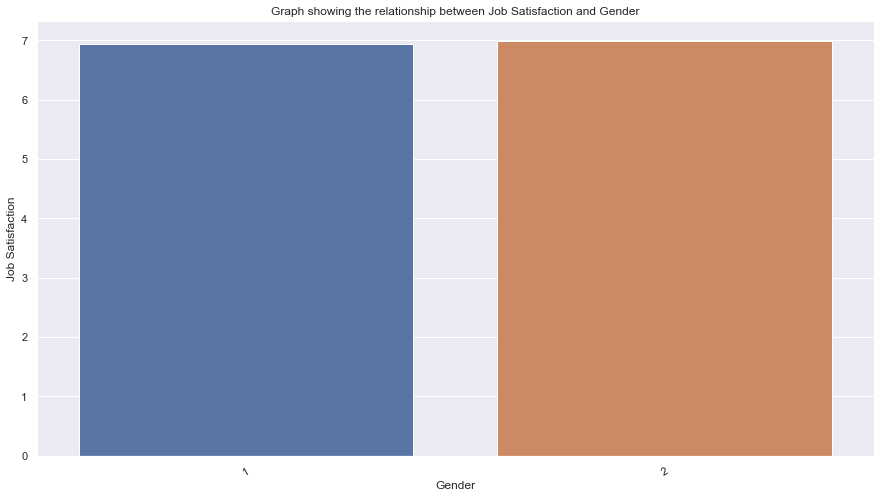

In [41]:
#plot the relationship
sns.set(rc = {'figure.figsize':(15,8)})

g = sns.barplot(x='gender', y='job_satisfaction', data=data_4)
g.set_xticklabels(g.get_xticklabels(),rotation = 30);
g.set(xlabel='Gender', ylabel='Job Satisfaction', title="Graph showing the relationship between Job Satisfaction and Gender");

Women are slightly more satisfied with their jobs than men, however it is unlikely that this is a significant difference.

### Salary
How does job satisfaction compare to monthly salary? 

In [42]:
#group the data by job satisfaction and salary
data_5 = data.groupby('job_satisfaction')['salary'].mean()

In [43]:
#put the new data into a dataframe and order it via the highest job satisfaction
data_5 = pd.DataFrame(data_5)
data_5 = data_5.sort_values('job_satisfaction', ascending=False)
data_5.head

<bound method NDFrame.head of                        salary
job_satisfaction             
10                6107.320552
9                 7001.295211
8                 6700.733126
7                 5330.908176
6                 7821.391454
5                 4900.020465
4                 8358.953526
3                 5047.001230
2                 4958.047070
1                 6374.212878
0                 4386.150968>

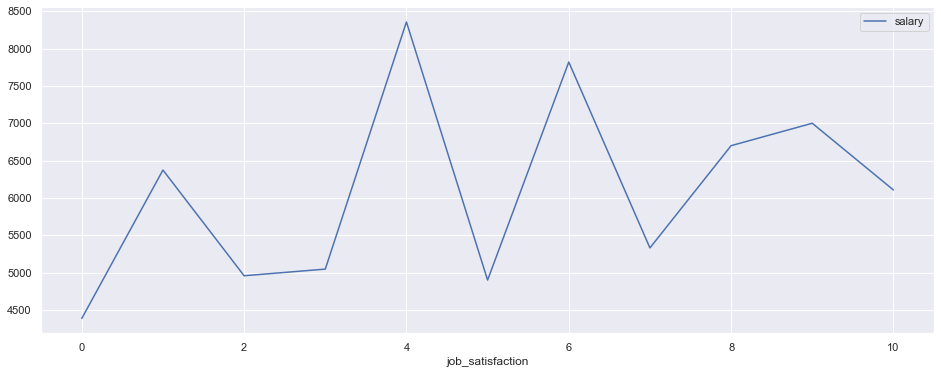

In [44]:
#plot data
data_5[['salary']].plot(figsize=(16,6))
plt.show();

In [47]:
data_51 = data_5.reset_index()

In [48]:
data_51

,job_satisfaction,salary
0,10,6107.320552
1,9,7001.295211
2,8,6700.733126
3,7,5330.908176
4,6,7821.391454
5,5,4900.020465
6,4,8358.953526
7,3,5047.001230
8,2,4958.047070
9,1,6374.212878


In [49]:
data51 = pd.DataFrame(data.salary) * 1e6

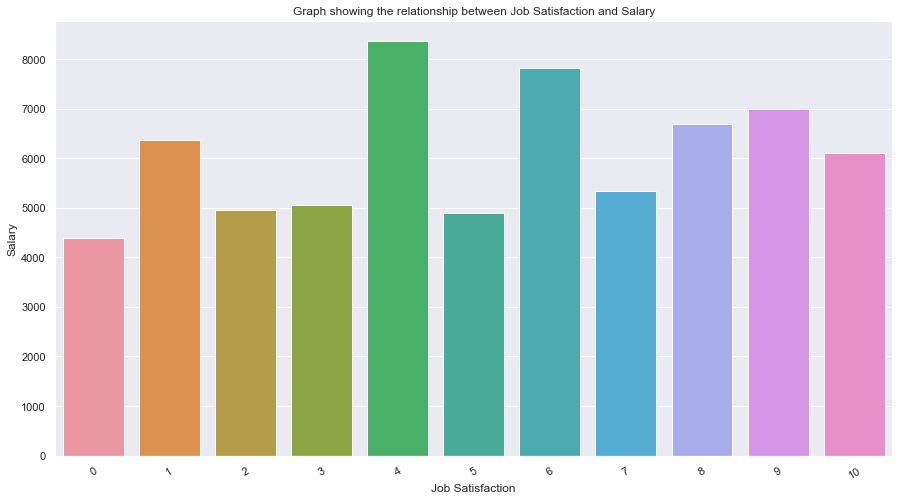

In [50]:
#plot the relationship
sns.set(rc = {'figure.figsize':(15,8)})
g = sns.barplot(x='job_satisfaction', y='salary', data=data_51)
g.set_xticklabels(g.get_xticklabels(),rotation = 30);
g.set(xlabel='Job Satisfaction', ylabel='Salary', title="Graph showing the relationship between Job Satisfaction and Salary");

From this graph, it looks like job satisfaction has little relationship with the amount of money someone earns each month. The individuals who earn the most amount of money rate their job satisfaction as 4 out of 10. 

### Job Description
How does job satisfaction compare to the job you do? 

In [51]:
#group the data by job satisfaction and job description
data_6 = data.groupby('job_description')['job_satisfaction'].mean()

In [52]:
#put this into a dataframe 
data_6 = pd.DataFrame(data_6)
data_6 = data_6.sort_values('job_satisfaction', ascending=False)
data_6.head()

,job_satisfaction
job_description,
"Subsistance Farmer, Fisher, Hunter",8.250000
"Skilled Forestry, Fishery & Hunting Worker",7.846154
Personal Care Worker,7.410995
Teaching,7.306234
Building & Related Trades Worker,7.242105


In [53]:
#reset the index
data6 = data_6.reset_index()

In [54]:
# add to a CSV for Tableau graphs
data6.to_csv('data6.csv')

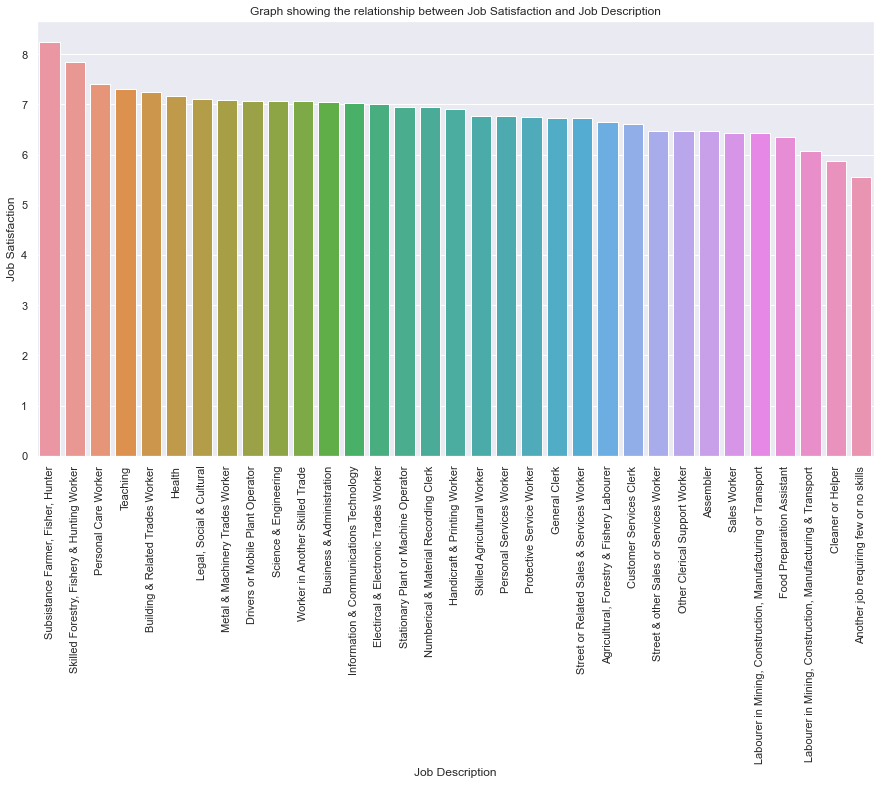

In [55]:
#plot the relationship between job description and satisfaction
sns.set(rc = {'figure.figsize':(15,8)})

g = sns.barplot(x='job_description', y='job_satisfaction', data=data6)
g.set_xticklabels(g.get_xticklabels(),rotation = 90);
g.set(xlabel='Job Description', ylabel='Job Satisfaction', title="Graph showing the relationship between Job Satisfaction and Job Description");

It's interesting to see the types of jobs that offer high levels of satisfaction. Jobs which offer high levels of job satisfaction include those working outdoors or with your hands, for example, farmers and construction workers, as well as those who work with others for example care workers and teachers. Jobs which do not do well in terms of their levels of satisfaction are those with lower skills such as cleaners and food preparation assistants. 

There's also a much larger range of job satisfaction here than there is for country, salary or age. 

### Qualification Level
How does job satisfaction compare to the level of qualification you have? 

In [56]:
#what are the different values of qualifications in the column?
data.qual_level.unique()

array([6, 7, 5])

In [57]:
#group together the qualification level and job satisfaction
data_7 = data.groupby('qual_level')['job_satisfaction'].mean()

In [58]:
#put together the information into a dataframe
data_7 = pd.DataFrame(data_7)
#data_7 = data_7.sort_values('job_satisfaction', ascending=False)
data_7.head()

,job_satisfaction
qual_level,
5,7.088260
6,6.924768
7,6.881898


In [59]:
data7 = data_7.reset_index()

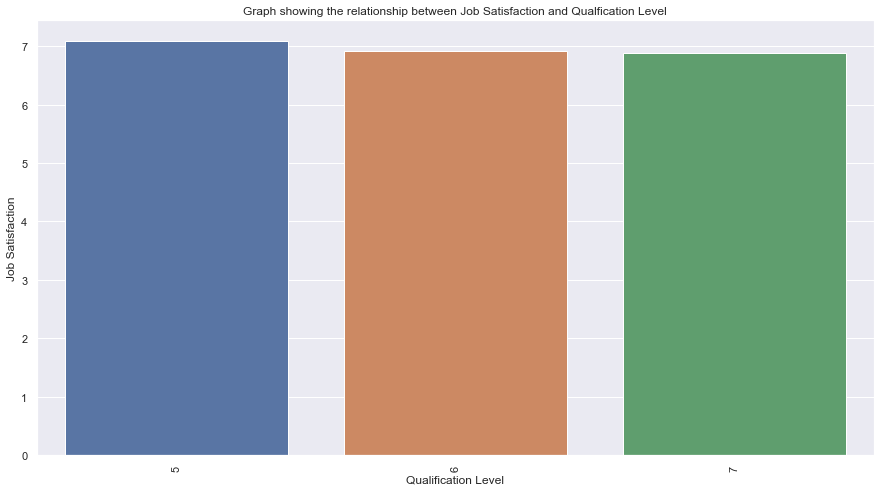

In [60]:
#plot the relationship
sns.set(rc = {'figure.figsize':(15,8)})

g = sns.barplot(x='qual_level', y='job_satisfaction', data=data7)
g.set_xticklabels(g.get_xticklabels(),rotation = 90);
g.set(xlabel='Qualification Level', ylabel='Job Satisfaction', title="Graph showing the relationship between Job Satisfaction and Qualfication Level");

Interestingly, as skill rating increases, job satisfaction decreases, which is almost the opposite of the above graph, where having a higher level of skills seems to suggest a higher level of job satisfaction. 

### Skill rating
Skill rating referes to how an individual rates the level of their skills. This is on a scale of 0-100 where 0 means you need to develop all of your skills and 100 means you have all the skills you need

In [61]:
#group the data by skill rating and job satisfaction
data_8 = data.groupby('skill_rating')['job_satisfaction'].mean()

In [62]:
#put this information into a dataframe
data_8 = pd.DataFrame(data_8)
#data_7 = data_7.sort_values('job_satisfaction', ascending=False)
data_8.head()

,job_satisfaction
skill_rating,
0,3.730769
1,4.000000
2,8.666667
3,8.000000
4,1.000000


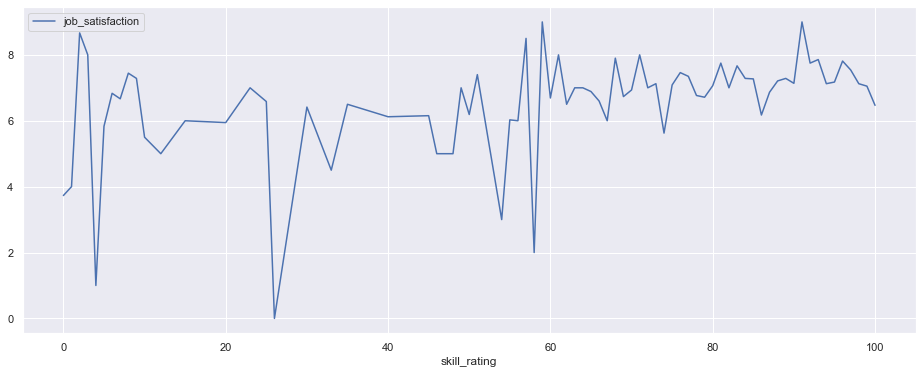

In [63]:
#plot the relationship in matplotlib
data_8[['job_satisfaction']].plot(figsize=(16,6));
plt.show();

In [64]:
data8 = data_8.reset_index()

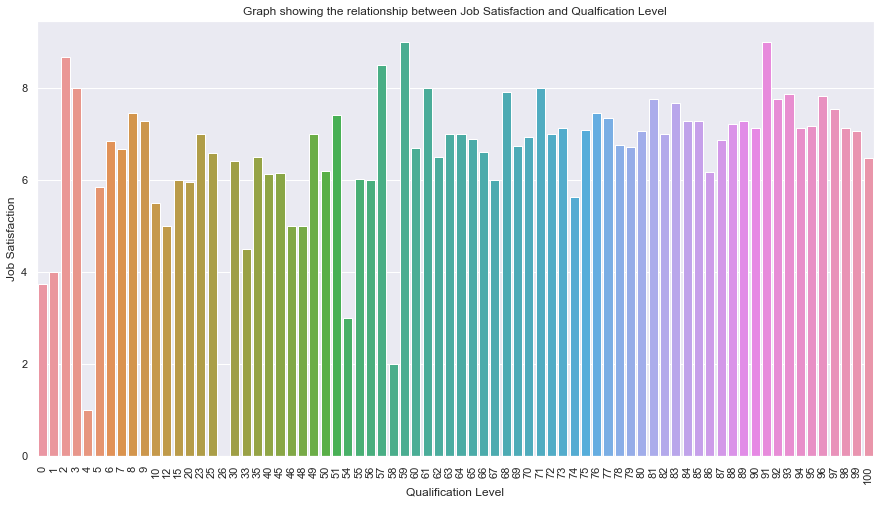

In [65]:
#plot the relationship in seaborn
sns.set(rc = {'figure.figsize':(15,8)})

g = sns.barplot(x='skill_rating', y='job_satisfaction', data=data8)
g.set_xticklabels(g.get_xticklabels(),rotation = 90);
g.set(xlabel='Qualification Level', ylabel='Job Satisfaction', title="Graph showing the relationship between Job Satisfaction and Qualfication Level");

There looks like there is very little relationship between skill rating and job satisfaction. At a push, job satisfaction increases with a person's skill rating. 

## Skills Match using Feature Engineering

For our second hypothesis, we need to divide the features that we will be using in our modeling into one of 5 categories that represent a mismatch. These are under skilled, over skilled, under qualified, over qualified and a horizontal mismatch. Here we start to create these here.

### Skill match needed have

First we'll look at the qualifications that are needed to enter into the career. 

In [66]:
#investigate the different values in the column qualifications you need to have to gain a role. 
data.qual_needed_have.unique()

array([  7,   4,   6,   3,   2,   8,   1,   5, 888])

In [77]:
#create a new dataframe so we can manipulate the data
data_short = data

In [78]:
#drop the don't know and not applicable elements of the data
data_short = data_short.drop(data_short[data_short.qual_needed_have > 7].index)

In [79]:
#see what the data looks like
data_short.shape

(15915, 96)

In [80]:
#put the information into a new dataframe with qualification level and job satisfaction
data_short = data_short[['qual_level','qual_needed_have', 'job_satisfaction']]
data_short

,qual_level,qual_needed_have,job_satisfaction
ID,,,
AT_250016,6,7,9
AT_250017,7,7,5
AT_250036,6,4,8
AT_250039,6,6,8
AT_250051,7,7,8
...,...,...,...
UK_29932167,6,6,5
UK_29960676,6,6,7
UK_29965068,6,6,10


In [81]:
#take qual_level away from qual_needed to gain
#this will give a value which will show how far away a person's qualfications are from what they need
#a positive number means that they are overqualified and a negative number means they are underqualified
data_short['qual_diff'] = data_short['qual_level'] - data_short['qual_needed_have']

In [82]:
#check out the dataframe
data_short

,qual_level,qual_needed_have,job_satisfaction,qual_diff
ID,,,,
AT_250016,6,7,9,-1
AT_250017,7,7,5,0
AT_250036,6,4,8,2
AT_250039,6,6,8,0
AT_250051,7,7,8,0
...,...,...,...,...
UK_29932167,6,6,5,0
UK_29960676,6,6,7,0
UK_29965068,6,6,10,0


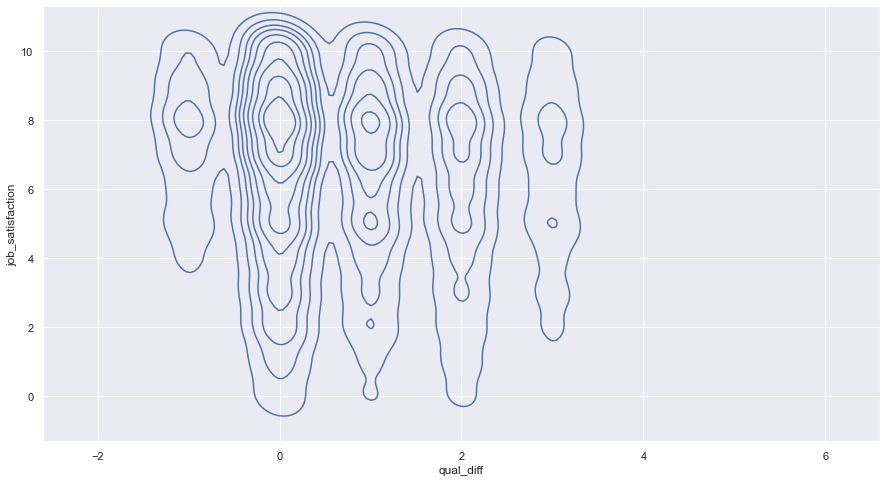

In [83]:
#plot the qualification difference and job satisfaction as a density plot
sns.kdeplot(data_short.qual_diff, data_short.job_satisfaction)
plt.show()

More people have qualifications higher than what they need, and this value has little affect on the level of job satisfaction. It looks as though most job satisfaction tends around 8, while there is more of a range of job satisfaction when the qualification difference ranges from 0-2. 

We can also look at the relationship between country, qualifications needed to enter the career and job satisfaction.

In [84]:
data_short_country = pd.merge(data_short, data, on ='ID')

In [85]:
data_short_country = data_short_country[['country', 'qual_needed_have_x']]

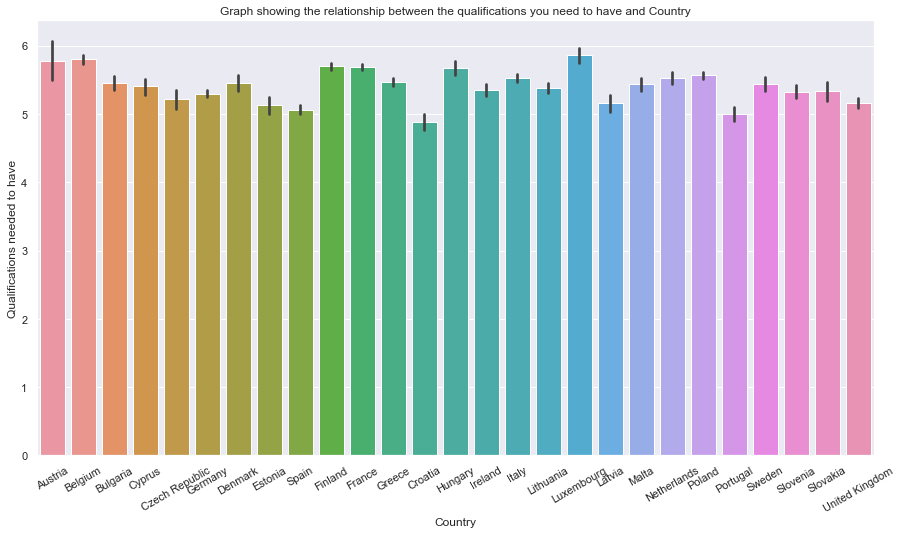

In [99]:
#plot the relationship between country, qualifications and job satisfaction
sns.set(rc = {'figure.figsize':(15,8)})

g = sns.barplot(x='country', y='qual_needed_have_x', data=data_short_country)
g.set_xticklabels(g.get_xticklabels(),rotation = 30);
g.set(xlabel='Country', ylabel='Qualifications needed to have', title="Graph showing the relationship between the qualifications you need to have and Country");

Interestingly, Luxembourg has both the highest level of skills needed for a role and the highest job satisfaction. This relationship doesn't seem to hold for other countries though.

### Skill match needed do

In the same way we can investigate what qualfications are needed to DO a role and the qualifications mismatch. 

In [87]:
#create a new dataframe so we can manipulate the data
data_match_have = data

In [88]:
#drop the don't know and not applicable elements of the data
data_match_have = data_match_have.drop(data_match_have[data_match_have.qual_needed_do > 7].index)

In [89]:
#put the information into a new dataframe with qualification level and job satisfaction
data_match_have = data_match_have[['qual_level','qual_needed_do', 'job_satisfaction']]
data_match_have

,qual_level,qual_needed_do,job_satisfaction
ID,,,
AT_250016,6,7,9
AT_250017,7,4,5
AT_250036,6,4,8
AT_250039,6,6,8
AT_250051,7,7,8
...,...,...,...
UK_29900285,7,6,8
UK_29932167,6,6,5
UK_29960676,6,6,7


In [90]:
#take qual_level away from qual_needed to have 
#this will give a value which will show how far away a person's qualfications are from what they need
#a positive number means that they are overqualified and a negative number means they are underqualified
data_match_have['qual_diff_have'] = data_match_have['qual_level'] - data_match_have['qual_needed_do']

In [91]:
#check out the dataframe
data_match_have

,qual_level,qual_needed_do,job_satisfaction,qual_diff_have
ID,,,,
AT_250016,6,7,9,-1
AT_250017,7,4,5,3
AT_250036,6,4,8,2
AT_250039,6,6,8,0
AT_250051,7,7,8,0
...,...,...,...,...
UK_29900285,7,6,8,1
UK_29932167,6,6,5,0
UK_29960676,6,6,7,0


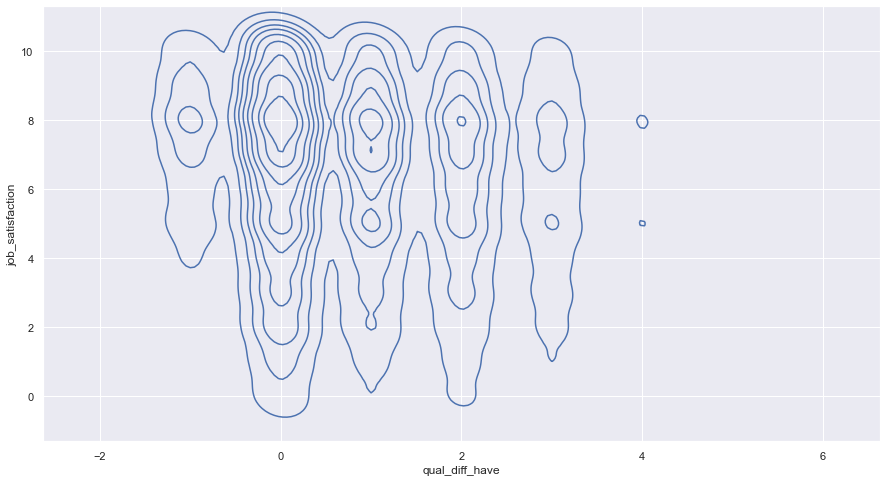

In [92]:
#plot the qualification difference and job satisfaction as a density plot
sns.kdeplot(data_match_have.qual_diff_have, data_match_have.job_satisfaction)
plt.show()

More people have qualifications higher than what they need, and this value has little affect on the level of job satisfaction. It looks as though most job satisfaction tends around 8, while there is more of a range of job satisfaction when the qualification difference ranges from 0-2. 

We can also look at the relationship between country, qualfications needed to do the job and job satisfaction.

In [93]:
data_match_have_country = pd.merge(data_match_have, data, on ='ID')

In [94]:
data_match_have_country = data_match_have_country[['country', 'qual_needed_do_x']]

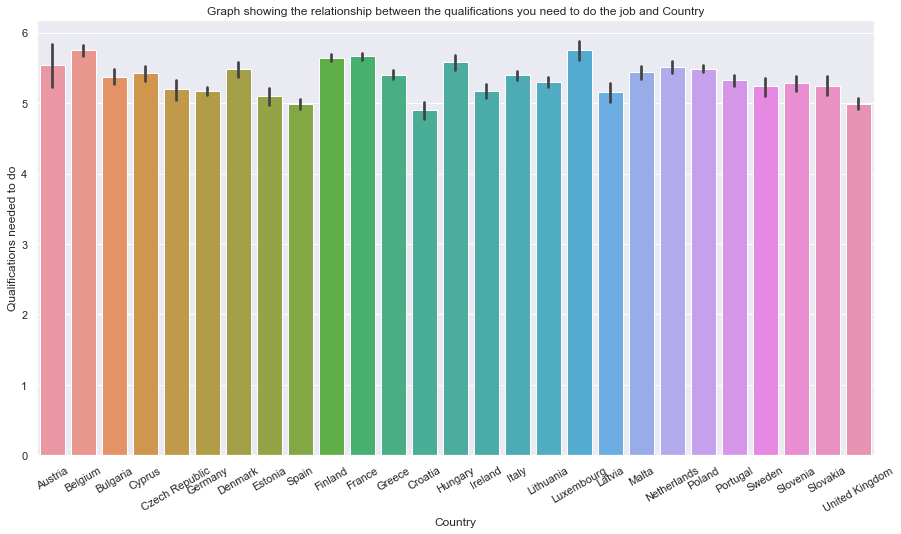

In [100]:
#plot the relationship
sns.set(rc = {'figure.figsize':(15,8)})

g = sns.barplot(x='country', y='qual_needed_do_x', data=data_match_have_country)
g.set_xticklabels(g.get_xticklabels(),rotation = 30);
g.set(xlabel='Country', ylabel='Qualifications needed to do', title="Graph showing the relationship between the qualifications you need to do the job and Country");

Once again, Luxembourg has the highest qualifications needed to do the job, although there looks like there is little relationship in general. We can investigate this by looking at the correlation between the two. 

In [96]:
data_match_have_country_new = pd.merge(data_match_have_country, data, on ='ID')

In [97]:
data_match_have_country_new = data_match_have_country_new[['country_x', 'qual_needed_do_x', 'job_satisfaction']]

In [98]:
data_match_have_country_new.corr()

,qual_needed_do_x,job_satisfaction
qual_needed_do_x,1.000000,0.152325
job_satisfaction,0.152325,1.000000


There looks like there is little positive correlation, if any!

### General Skills Match

Skills match asks 'How would you best describe your skills in relation to what is required to do your job?' 1 means that individual skills are higher that the job, 2 means skills are matched to the job and 3 means skills are lower than what is required by the job and needs to be further developed.

In [101]:
#create a new dataframe so we can manipulate the data
data_general_match = data

In [102]:
#drop the don't know and not applicable elements of the data
data_general_match = data_general_match.drop(data_general_match[data_general_match.skill_match == 99].index)

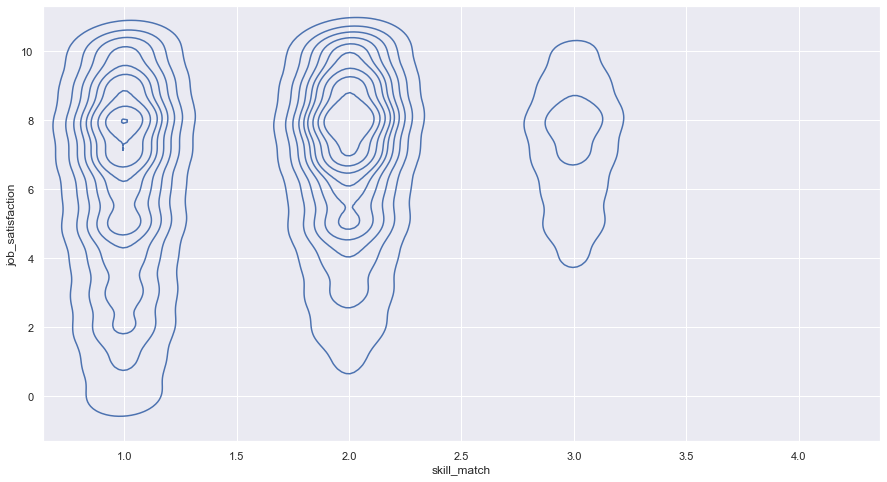

In [103]:
#plot the skills match and job satisfaction as a density plot
sns.kdeplot(data_general_match.skill_match, data_general_match.job_satisfaction)
plt.show()

Most individuals are either matched to their job or over matched. The range of job satisfaction is larger for those who have higher skills than their job requires, and the mean for all categories tends towards 8 once again. 

### Industry trained in vs industry working in
We'll now look at the difference between the industry that an individual works in and that which he or she trained in and compare this to job satisfaction.

In [104]:
#put these together in a new dataframe
data_industry = data[['job_description','qual_field', 'job_satisfaction']]

In [105]:
#specify the conditions in which the job description and qualification field can be deemed a match
conditions = [(data_industry['job_description'] == 'Health') 
              & (data_industry['qual_field'] == 'Medicine & Healthcare'), 
             (data_industry['job_description'] == 'Teaching') 
              & (data_industry['qual_field'] == 'Teacher training & education sciences'),
             (data_industry['job_description'] == 'Legal, Social & Cultural') 
              & (data_industry['qual_field'] == 'Social sciences'),
             (data_industry['job_description'] == 'Information & Communications Technology') 
              & (data_industry['qual_field'] == 'Economics, Business, Law & Finance'),
             (data_industry['job_description'] == 'Business & Administration') 
              & (data_industry['qual_field'] == 'Economics, Business, Law & Finance'),
             (data_industry['job_description'] == 'Legal, Social & Cultural') 
              & (data_industry['qual_field'] == 'Economics, Business, Law & Finance'),
             (data_industry['job_description'] == 'Science & Engineering') 
              & (data_industry['qual_field'] == 'Engineering'),
             (data_industry['job_description'] == 'Information & Communications Technology') 
              & (data_industry['qual_field'] == 'Computing'),
             (data_industry['job_description'] == 'Science & Engineering') 
              & (data_industry['qual_field'] == 'Natural Sciences'),
             (data_industry['job_description'] == 'Legal, Social & Cultural') 
              & (data_industry['qual_field'] == 'Humanities, Languages & Arts'),
             (data_industry['job_description'] == 'Science & Engineering') 
              & (data_industry['qual_field'] == 'Agriculture & Veterinary Sciences'),
             (data_industry['job_description'] == 'Skilled Agricultural Worker') 
              & (data_industry['qual_field'] == 'Agriculture & Veterinary Sciences'),
             (data_industry['job_description'] == 'Skilled Forestry, Fishery & Hunting Worker') 
              & (data_industry['qual_field'] == 'Agriculture & Veterinary Sciences'),
             (data_industry['job_description'] == 'Personal Services Worker') 
              & (data_industry['qual_field'] == 'Security, Transport & Personal Services'),
             (data_industry['job_description'] == 'Information & Communications Technology') 
              & (data_industry['qual_field'] == 'Maths'),
             (data_industry['job_description'] == 'Business & Administration') 
              & (data_industry['qual_field'] == 'Maths'),
             (data_industry['job_description'] == 'Science & Engineering') 
              & (data_industry['qual_field'] == 'Maths'),]

In [106]:
#change all the values of the matches to one 
values = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [107]:
#put these values in a new column in the dataframe
data_industry['match'] = np.select(conditions, values)

In [108]:
data_industry.head(20)

,job_description,qual_field,job_satisfaction,match
ID,,,,
AT_250016,Teaching,Teacher training & education sciences,9,1
AT_250017,General Clerk,Social Sciences,5,0
AT_250036,Numberical & Material Recording Clerk,"Economics, Business, Law & Finance",8,0
AT_250039,"Legal, Social & Cultural",Teacher training & education sciences,8,0
AT_250051,Personal Services Worker,Teacher training & education sciences,8,0
AT_250080,Information & Communications Technology,Computing,9,1
AT_250082,Science & Engineering,Natural Sciences,1,1
AT_250160,Science & Engineering,"Economics, Business, Law & Finance",9,0
AT_250172,Teaching,Teacher training & education sciences,9,1


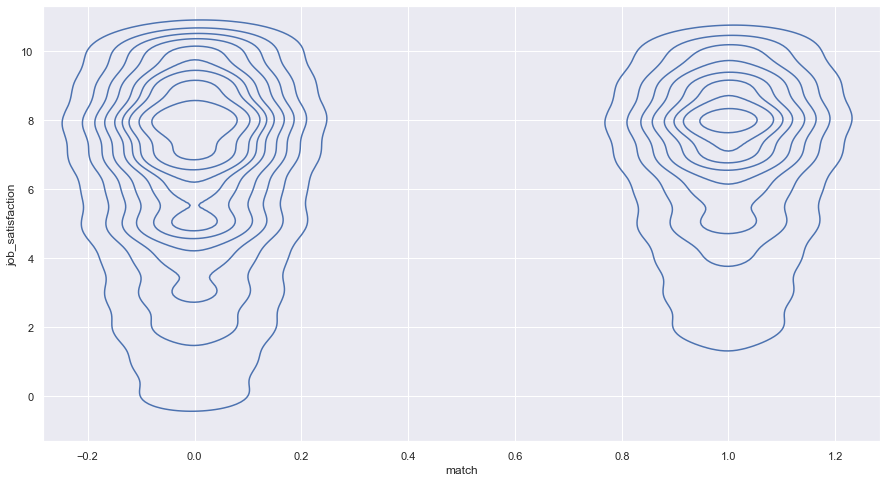

In [109]:
#plot job satisfaction vs job/qualification match
sns.kdeplot(data_industry.match, data_industry.job_satisfaction)
plt.show()

As 1 is a match and 0 is not a match, more people are not matched to their qualification, and those that are not matched have a wider range of job satisfaction. 

## Investigating Everything

Investigate the distribution of all the columns

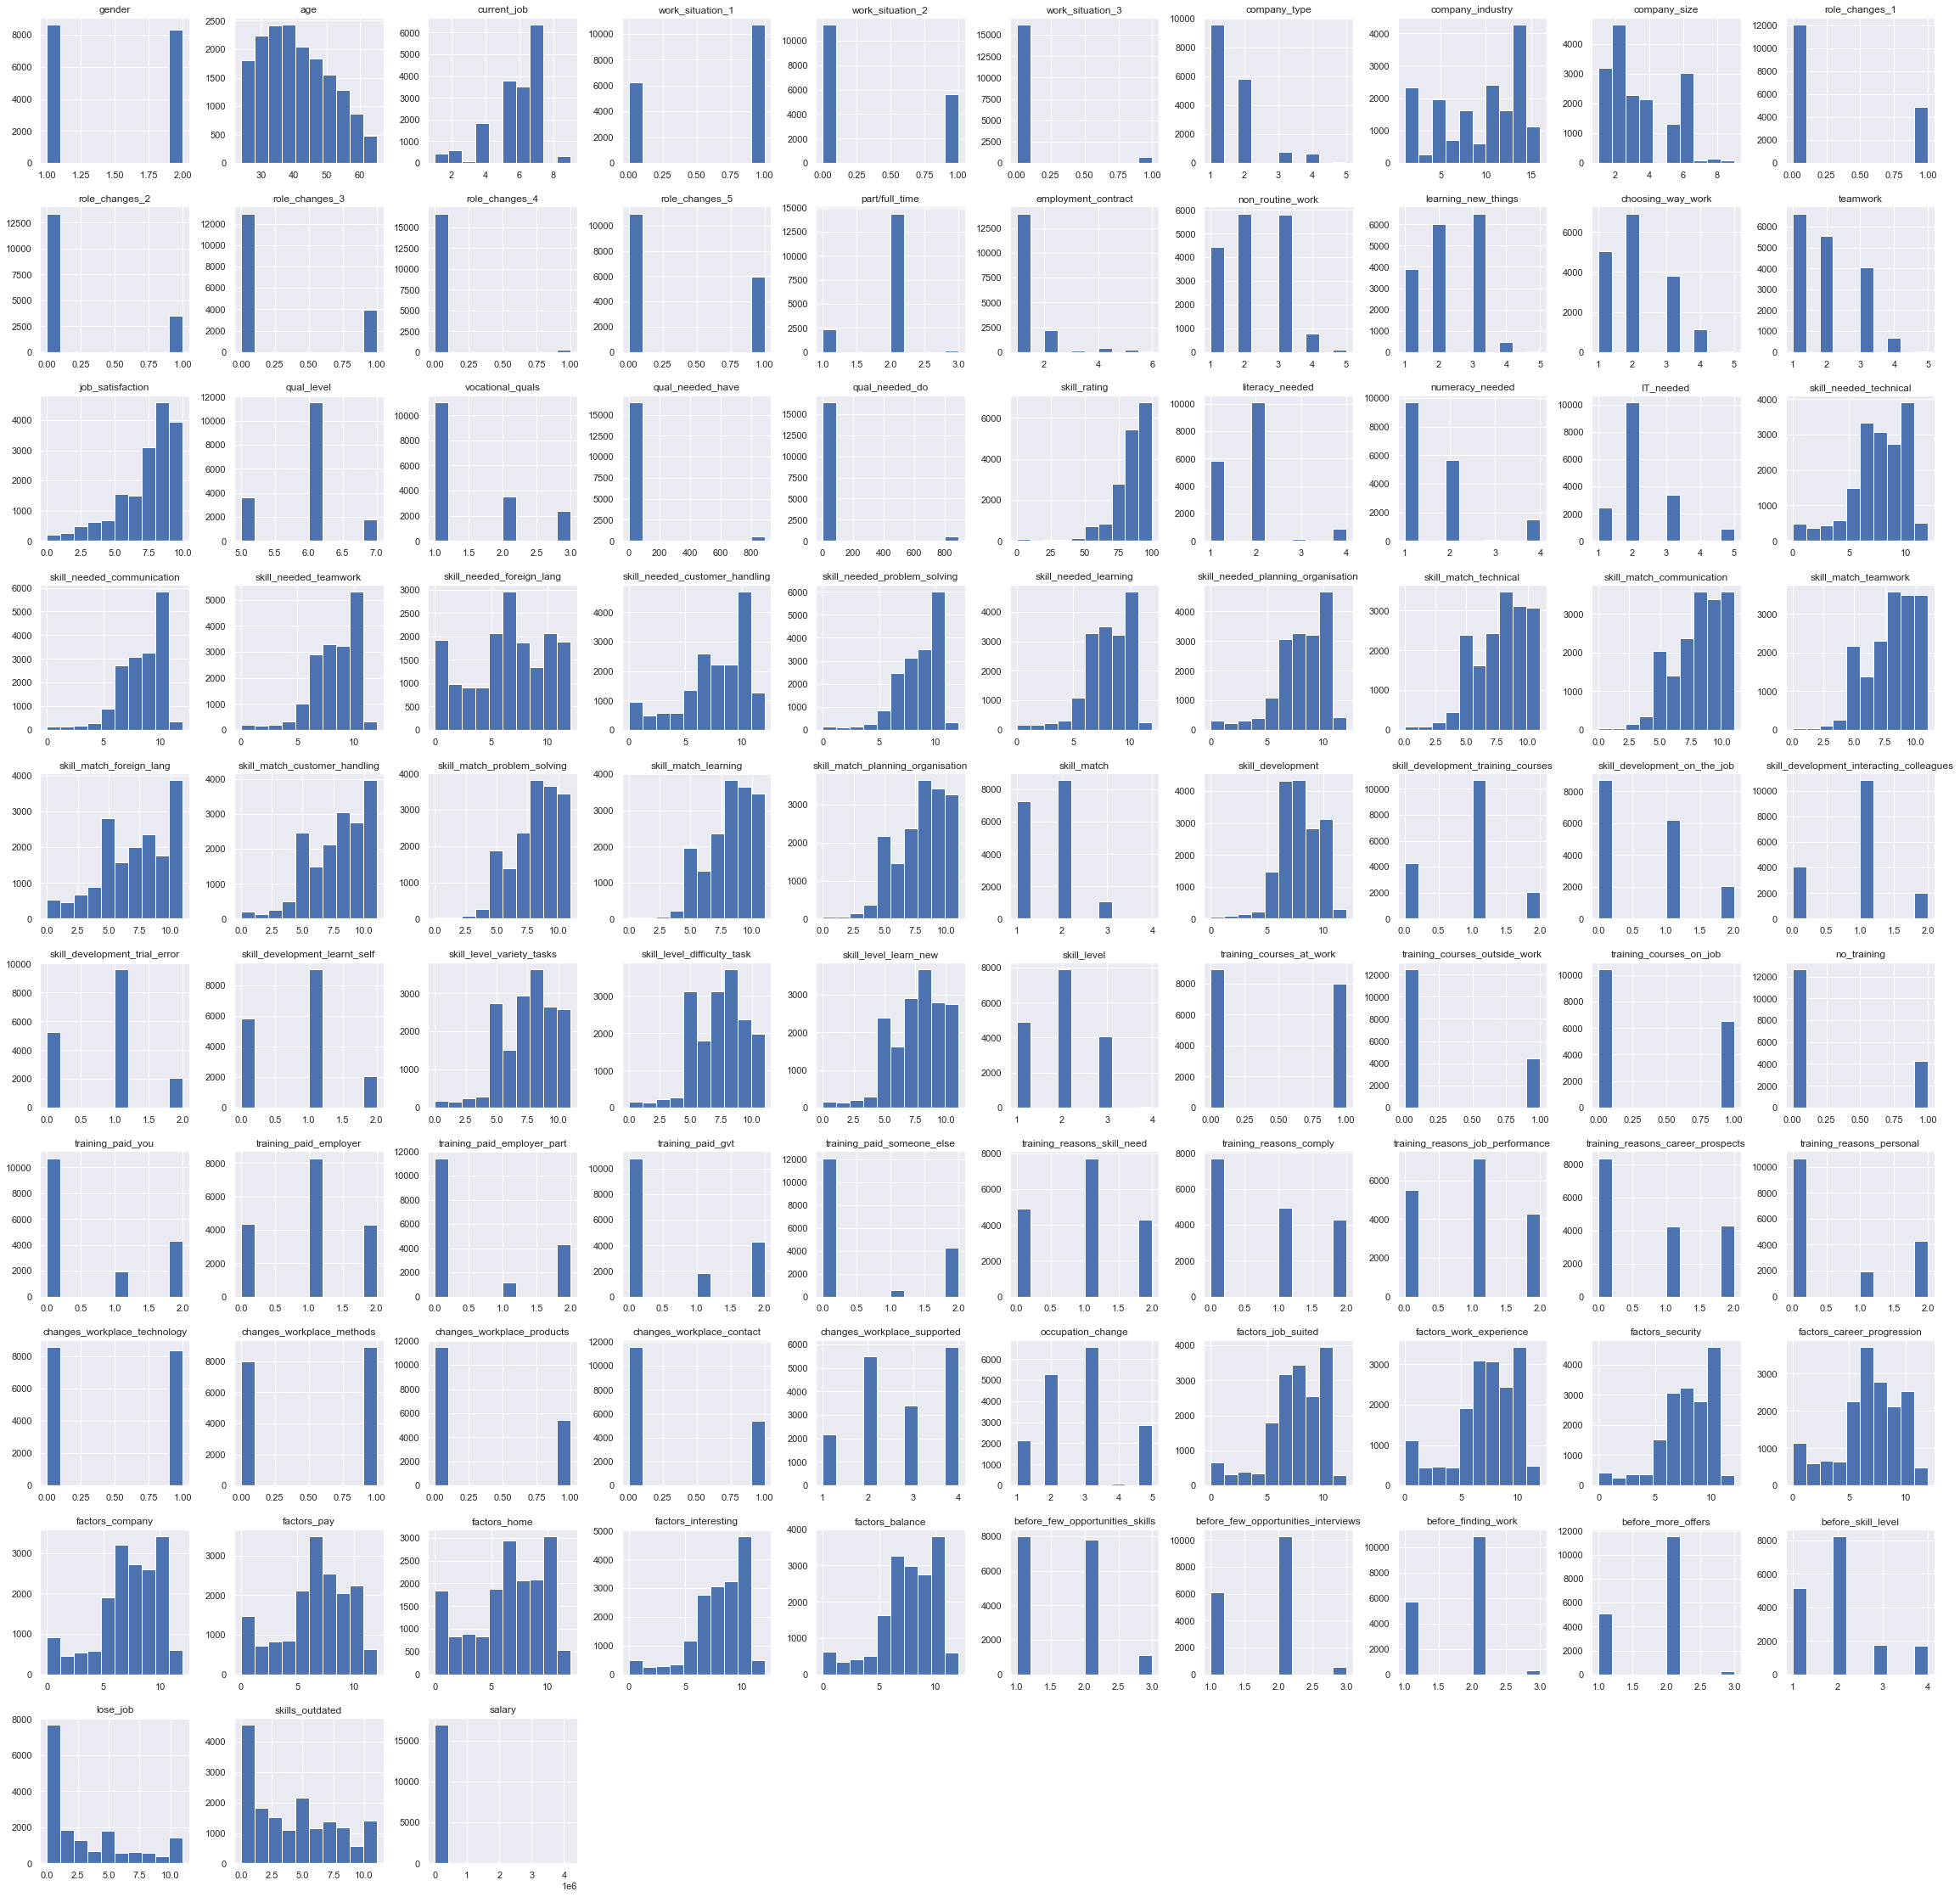

In [110]:
data.hist(figsize=(40,40))
plt.show()

By having a look at the distribution we can identify a few intersting factors to plot more closely. These will be skills needed, skill match and factors. 

### Skill needed 

Skills needed asks respondents what level of specific skills they need to do a job from 1 to 10. 

In [111]:
#put all the skills needed variables into a dataframe
data_skill_needed =  data[['skill_needed_technical',
                        'skill_needed_communication', 'skill_needed_teamwork',
                         'skill_needed_foreign_lang', 'skill_needed_customer_handling',
                           'skill_needed_problem_solving', 'skill_needed_learning',
                          'skill_needed_planning_organisation']]

In [112]:
#find the unique values
data_skill_needed.skill_needed_technical.unique()

array([ 6,  7,  5,  4, 10,  3, 11,  9,  2,  8,  1, 12,  0])

In [113]:
#disregard those that are don't knows and not applicables
data_skill_needed = data_skill_needed.drop(data_skill_needed[data_skill_needed.skill_needed_technical > 10].index)
data_skill_needed = data_skill_needed.drop(data_skill_needed[data_skill_needed.skill_needed_communication > 10].index)
data_skill_needed = data_skill_needed.drop(data_skill_needed[data_skill_needed.skill_needed_teamwork > 10].index)
data_skill_needed = data_skill_needed.drop(data_skill_needed[data_skill_needed.skill_needed_foreign_lang > 10].index)
data_skill_needed = data_skill_needed.drop(data_skill_needed[data_skill_needed.skill_needed_customer_handling > 10].index)
data_skill_needed = data_skill_needed.drop(data_skill_needed[data_skill_needed.skill_needed_problem_solving > 10].index)
data_skill_needed = data_skill_needed.drop(data_skill_needed[data_skill_needed.skill_needed_learning > 10].index)
data_skill_needed = data_skill_needed.drop(data_skill_needed[data_skill_needed.skill_needed_planning_organisation > 10].index)

In [114]:
#see what the dataframe looks like
data_skill_needed

,skill_needed_technical,skill_needed_communication,skill_needed_teamwork,skill_needed_foreign_lang,skill_needed_customer_handling,skill_needed_problem_solving,skill_needed_learning,skill_needed_planning_organisation
ID,,,,,,,,
AT_250016,6,10,9,7,10,10,10,10
AT_250036,5,8,9,4,2,7,7,8
AT_250039,5,10,10,2,10,10,10,10
AT_250051,4,10,10,7,10,10,6,8
AT_250080,10,9,9,7,8,9,10,8
...,...,...,...,...,...,...,...,...
UK_29900285,10,10,10,0,10,10,10,10
UK_29944089,6,9,8,1,9,8,7,7
UK_29960676,8,10,10,2,9,10,8,9


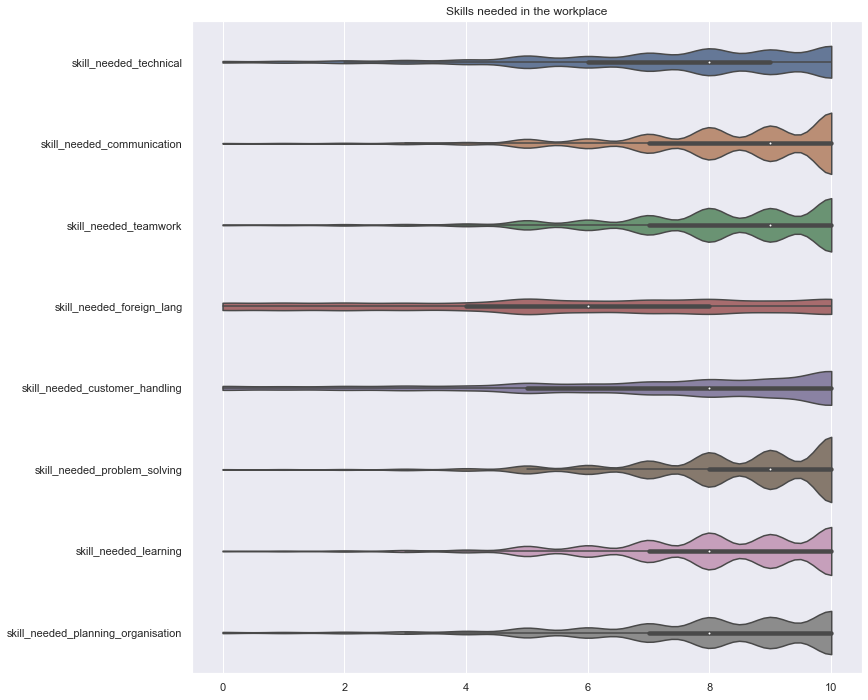

In [115]:
#plot these using violin plots
fig, ax = plt.subplots(figsize=(12, 12))

sns.violinplot(data=data_skill_needed, orient='h',
               fliersize=8, linewidth=1.5, notch=False,
               saturation=0.5, cut=0, ax=ax). set(title= 'Skills needed in the workplace')


plt.show()

From the violin plots we can see that communication and problem solving are the two skills that are needed most in the workplace. The skill needed least is foreign languages and to some degree, customer handling. 

### Skill match

Skill match asks respondents to best describe each of their skill in relation what's required in the job. 0 is no skill match whereas 10 is fully matched.

In [116]:
#put all the skills matched variables into a dataframe
data_match = data[['skill_match_technical',
                          'skill_match_communication', 'skill_match_teamwork',
                         'skill_match_foreign_lang', 'skill_match_customer_handling',
                         'skill_match_problem_solving','skill_match_learning',
                           'skill_match_planning_organisation']]

In [117]:
#disregard values that are don't knows and not applicables
data_match = data_match.drop(data_match[data_match.skill_match_technical > 10].index)
data_match = data_match.drop(data_match[data_match.skill_match_communication > 10].index)
data_match = data_match.drop(data_match[data_match.skill_match_teamwork > 10].index)
data_match = data_match.drop(data_match[data_match.skill_match_foreign_lang > 10].index)
data_match = data_match.drop(data_match[data_match.skill_match_customer_handling > 10].index)
data_match = data_match.drop(data_match[data_match.skill_match_problem_solving > 10].index)
data_match = data_match.drop(data_match[data_match.skill_match_learning > 10].index)
data_match = data_match.drop(data_match[data_match.skill_match_planning_organisation > 10].index)

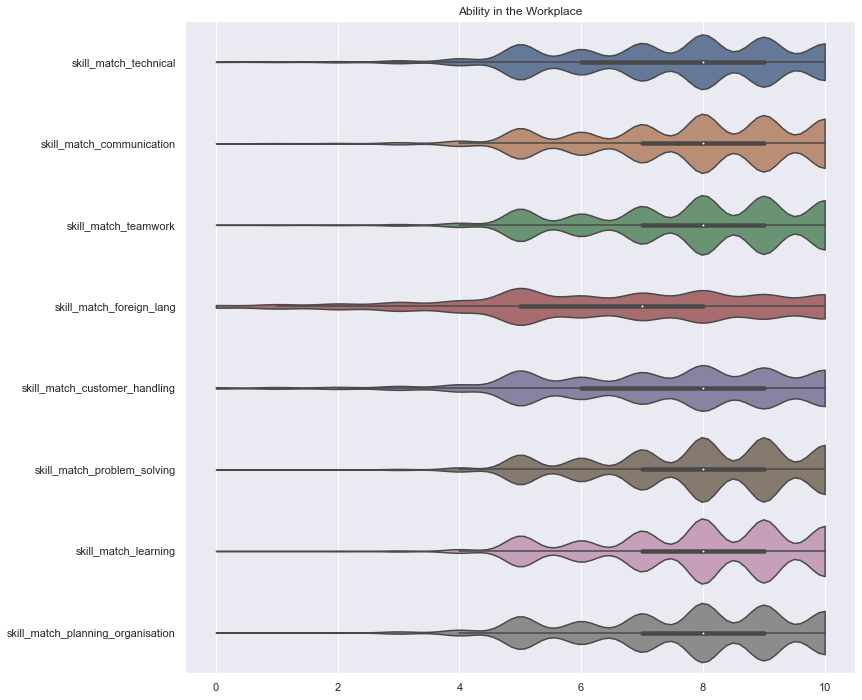

In [118]:
#plot these using violin plots
fig, ax = plt.subplots(figsize=(12, 12))

sns.violinplot(data=data_match, orient='h',
               fliersize=8, linewidth=1.5, notch=False,
               saturation=0.5, cut=0, ax=ax).set(title= 'Ability in the Workplace')


plt.show()

Skill match refers to how an individual would best describe each skill in relation what's required in their job. 
0 is no skill match whereas 10 is fully matched. 

Most skills are matched very similarly with individuals reporting a skill match of either 8 or 9 and very few below 5. The only difference is foreign language, which suggests that people could improve their foreign language skills. 

### Factors

Factors asks what are the reasons that a respondent chose their last job. 

In [119]:
#put all the factors variables into a dataframe
data_factors = data[['factors_job_suited',
                    'factors_work_experience',
                         'factors_security',
                        'factors_career_progression',
                        'factors_company',
                         'factors_pay',
                        'factors_home',
                        'factors_interesting',
                         'factors_balance']]

In [120]:
#disregard values that are don't knows and not applicables
data_factors = data_factors.drop(data_factors[data_factors.factors_job_suited > 10].index)
data_factors = data_factors.drop(data_factors[data_factors.factors_work_experience > 10].index)
data_factors = data_factors.drop(data_factors[data_factors.factors_security > 10].index)
data_factors = data_factors.drop(data_factors[data_factors.factors_career_progression > 10].index)
data_factors = data_factors.drop(data_factors[data_factors.factors_company > 10].index)
data_factors = data_factors.drop(data_factors[data_factors.factors_pay > 10].index)
data_factors = data_factors.drop(data_factors[data_factors.factors_home > 10].index)
data_factors = data_factors.drop(data_factors[data_factors.factors_interesting > 10].index)
data_factors = data_factors.drop(data_factors[data_factors.factors_balance > 10].index)

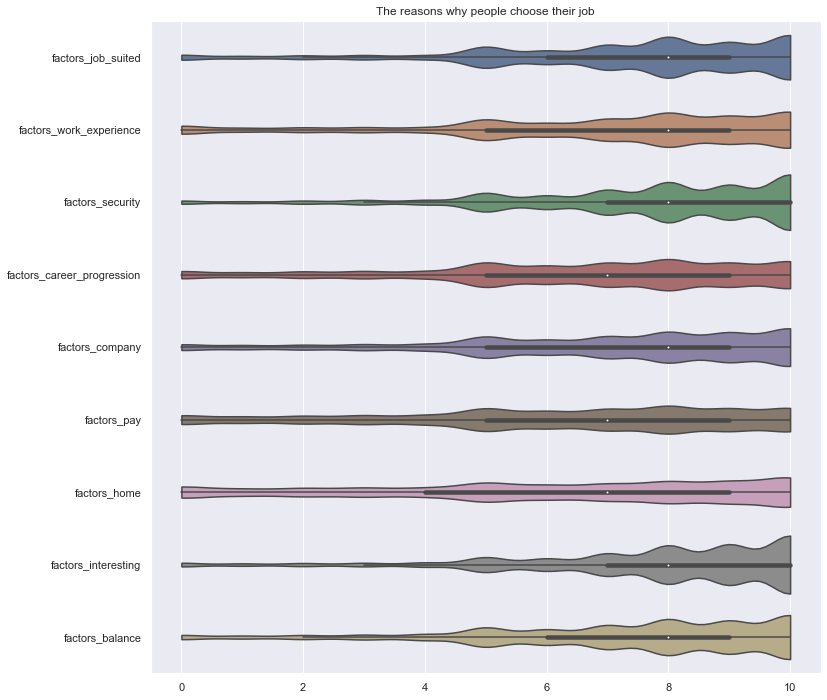

In [121]:
#plot these using violin plots
fig, ax = plt.subplots(figsize=(12, 12))

sns.violinplot(data=data_factors, orient='h',
               fliersize=8, linewidth=1.5, notch=False,
               saturation=0.5, cut=0, ax=ax).set(title= 'The reasons why people choose their job')


plt.show()

Factors refer to why people have chosen the job they did and the scale of 0-10 shows the importance of that factor to them. The most important factors are that it's interesting and offers job security, whilst whether the job was close to home or the amount of pay had less of an impact. 

# Correlations

Next we'll look at correlations between different factors to see whether there are any that are especially correlated. 

In [135]:
#looking at the whole correlation table, there are far too many values. 
data_corr = data.corr()
data_corr

,gender,age,current_job,work_situation_1,work_situation_2,work_situation_3,company_type,company_industry,company_size,role_changes_1,...,factors_interesting,factors_balance,before_few_opportunities_skills,before_few_opportunities_interviews,before_finding_work,before_more_offers,before_skill_level,lose_job,skills_outdated,salary
gender,1.000000,-0.057098,0.066114,-0.055683,0.066080,-0.052622,0.117592,0.111762,-0.096841,-0.079777,...,0.036084,0.063871,-0.028570,-0.012645,-0.027839,0.049087,0.028292,0.022880,-0.020427,-0.027639
age,-0.057098,1.000000,0.031372,0.013297,-0.021174,0.018609,0.124297,0.024200,0.042668,0.064656,...,0.070914,0.043536,0.026253,0.119553,0.124293,0.043084,-0.061241,-0.046902,-0.017862,0.028822
current_job,0.066114,0.031372,1.000000,0.012107,-0.006718,-0.000609,0.147236,0.203402,0.079125,0.062699,...,0.113786,0.000088,0.017395,0.082427,0.082765,-0.002676,0.052897,-0.046365,-0.001426,0.009057
work_situation_1,-0.055683,0.013297,0.012107,1.000000,-0.922077,-0.188706,0.004376,-0.045539,0.213774,0.076726,...,-0.010811,-0.005468,0.005709,0.007349,0.010762,-0.021489,-0.034279,-0.035682,0.018885,0.009921
work_situation_2,0.066080,-0.021174,-0.006718,-0.922077,1.000000,-0.122069,-0.014461,0.036279,-0.217069,-0.058803,...,0.010266,0.012102,-0.006567,-0.007875,-0.011499,0.021007,0.032364,0.018513,-0.027373,-0.011239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
before_more_offers,0.049087,0.043084,-0.002676,-0.021489,0.021007,-0.013206,0.055650,0.021953,-0.016189,-0.051803,...,-0.057777,-0.024285,0.015640,0.001340,0.045479,1.000000,0.060911,0.034581,0.010078,-0.015434
before_skill_level,0.028292,-0.061241,0.052897,-0.034279,0.032364,-0.013761,0.024459,0.036977,-0.008823,0.045167,...,0.032057,0.006662,0.067622,0.068489,0.057520,0.060911,1.000000,-0.023350,0.017002,-0.008353
lose_job,0.022880,-0.046902,-0.046365,-0.035682,0.018513,0.048099,-0.049731,-0.020933,-0.062660,-0.107698,...,-0.086240,-0.057765,-0.094681,-0.163973,-0.154500,0.034581,-0.023350,1.000000,0.323029,-0.024214
skills_outdated,-0.020427,-0.017862,-0.001426,0.018885,-0.027373,0.021792,-0.033236,-0.025005,-0.003195,-0.023816,...,-0.053921,-0.047147,-0.050248,-0.084318,-0.073153,0.010078,0.017002,0.323029,1.000000,-0.003062


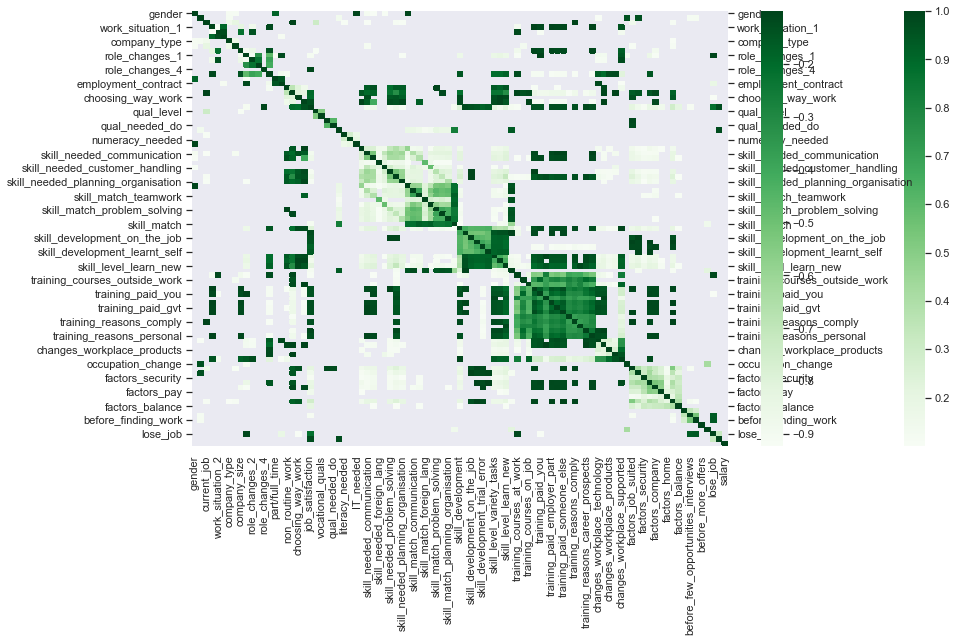

In [136]:
#heatmap of all correlations greater than 0.1 or less than -0.1
fig, ax = plt.subplots()
kot1 = data_corr [data_corr >= 0.1]
kot2 = data_corr [data_corr < -0.1]
sns.heatmap(kot1, cmap="Greens")
ax2 = ax.twinx()
sns.heatmap(kot2, cmap="Greens")
plt.show()

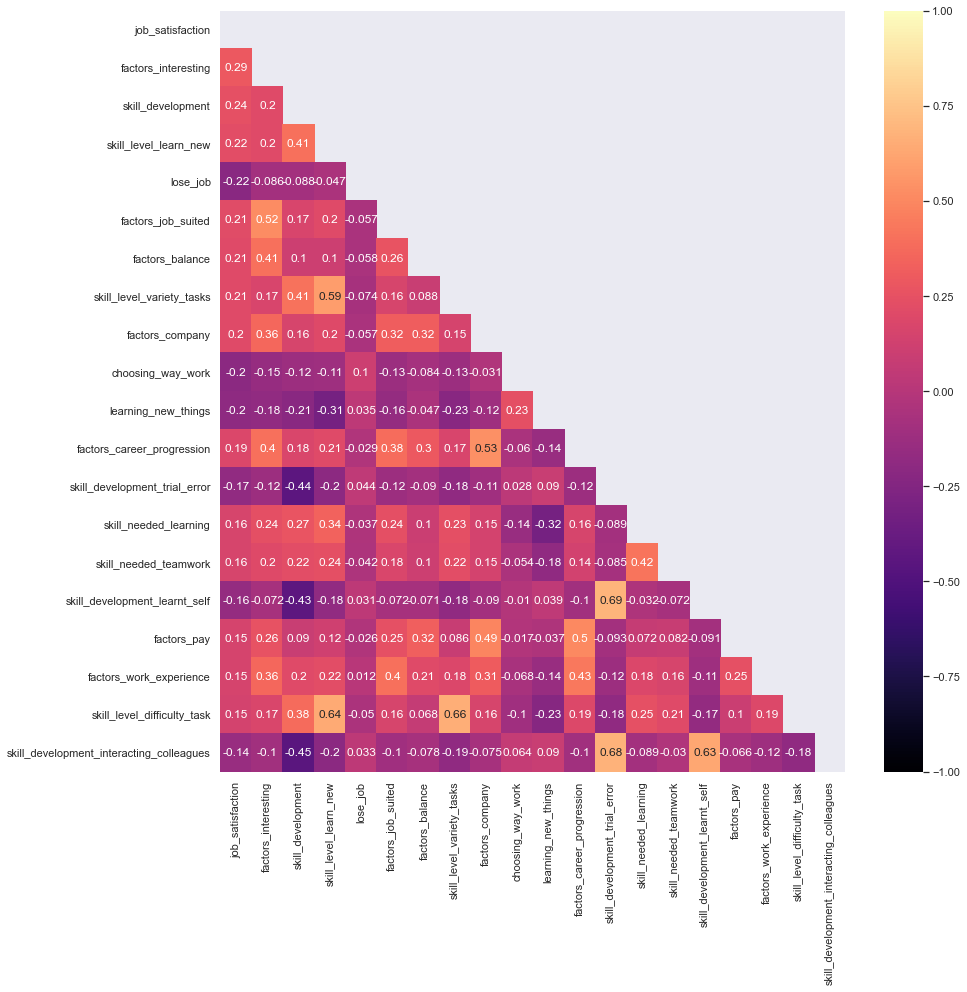

In [137]:
#correlation heatmpa of the top 20 correlations
data_corr = data.corr()
sorted = data_corr.unstack().sort_values(ascending=False)
data_corr.loc[:,'job_satisfaction'].abs().sort_values(ascending=False)
data_corr20 = pd.DataFrame(data_corr.loc[:,'job_satisfaction'].abs().sort_values(ascending=False))
x = data_corr20.reset_index().iloc[:20,0].tolist()
plt.figure(figsize=(14, 14))
mask =np.zeros_like(data[x].corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data[x].corr(), mask=mask, annot=True,cmap='magma',vmin=-1, vmax=1);
plt.show()

As you can see, there are not that many correlations left and in general, our factors are not that highly correlated with one another.

There are a few areas which are more correlated with one another, these include the skills needed, reasons you took your last job, and whether you've recently been taking training and why.

There are also a few features that are correlated with a lot of factors, and these are primarily whether your skill level in certain areas e.g. the difficulty of tasks have increased or decreased in your current role. 

We'll then have a look at which specific features correlate with our target variable, job satsifaction.

In [138]:
#take out the job satisfaction column 
datacorr = data[data.columns[:]].corr()['job_satisfaction'][:]
datacorr = pd.DataFrame(datacorr)
datacorr = datacorr.sort_values('job_satisfaction', ascending=False)
datacorr = datacorr.drop(datacorr.index[0])
datacorr

,job_satisfaction
factors_interesting,0.291374
skill_development,0.243630
skill_level_learn_new,0.221707
factors_job_suited,0.213124
factors_balance,0.210823
...,...
skill_development_learnt_self,-0.157630
skill_development_trial_error,-0.174407
learning_new_things,-0.195258
choosing_way_work,-0.203545


In [139]:
#reset the index
datacorr_1 = datacorr.reset_index()

In [140]:
datacorr_1 = datacorr_1.drop(datacorr_1[datacorr_1.job_satisfaction < 0.1].index & datacorr_1[datacorr_1.job_satisfaction > -0.1].index)

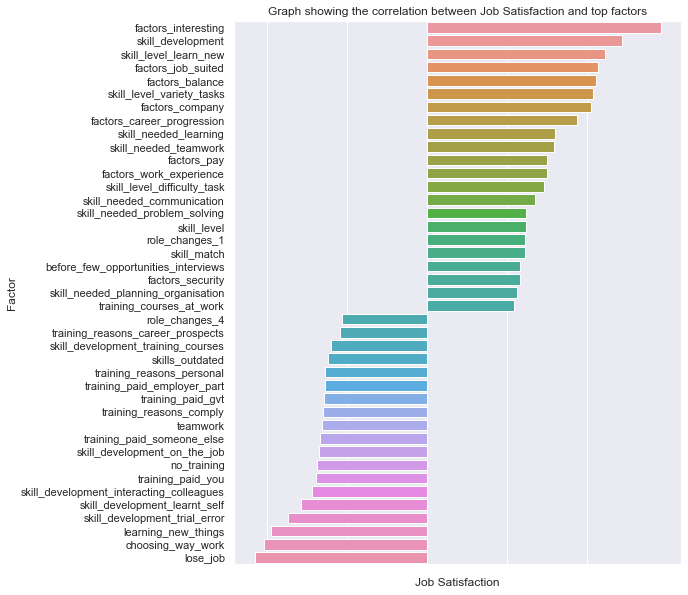

In [141]:
#plot the correlation of factors with Job Satisfaction. 
sns.set(rc = {'figure.figsize':(8,10)})

g = sns.barplot(data = datacorr_1, x="job_satisfaction", y='index')
g.set_xticklabels(g.get_xticklabels());
plt.xticks([-.2, -.1, 0, .1, .2])
g.set(xlabel='Job Satisfaction', ylabel='Factor', title="Graph showing the correlation between Job Satisfaction and top factors");

Here we can see that there are a number of factors which are correlated with Job Satisfaction to a great degree than others. 

In a postive direction, these include whether the job is interesting, whether you've learnt new skills since starting the job, and whether you chose the position because you thought it was a good fit.

In a negative direction, this includes whether you might lose your job in the next year. 

# Further Feature Engineering

Further feature engineering was needed to ensure that the right data was available for modelling. 

As my hypothesis asked whether I could predict job satisfaction based on five factors, being underqualfied, overqualified, over skilled, underskilled or in a job that did not match the subject of your qualification, I merged all this data into one dataframe. 

In [142]:
data_small = pd.merge(data_short, data_match_have, on ='ID')
data_small

,qual_level_x,qual_needed_have,job_satisfaction_x,qual_diff,qual_level_y,qual_needed_do,job_satisfaction_y,qual_diff_have
ID,,,,,,,,
AT_250016,6,7,9,-1,6,7,9,-1
AT_250017,7,7,5,0,7,4,5,3
AT_250036,6,4,8,2,6,4,8,2
AT_250039,6,6,8,0,6,6,8,0
AT_250051,7,7,8,0,7,7,8,0
...,...,...,...,...,...,...,...,...
UK_29900285,7,6,8,1,7,6,8,1
UK_29932167,6,6,5,0,6,6,5,0
UK_29960676,6,6,7,0,6,6,7,0


In [143]:
data_small = data_small[['qual_level_x', 'qual_needed_have', 'job_satisfaction_x', 
                         'qual_needed_do', 'qual_diff_have', 'qual_diff' ]]

In [144]:
data_small = pd.merge(data_small, data_general_match, on ='ID')
data_small

,qual_level_x,qual_needed_have_x,job_satisfaction_x,qual_needed_do_x,qual_diff_have,qual_diff,gender,age,country,current_job,...,before_few_opportunities_skills,before_few_opportunities_interviews,before_finding_work,before_more_offers,before_skill_level,lose_job,skills_outdated,salary,job_description,qual_field
ID,,,,,,,,,,,,,,,,,,,,,
AT_250016,6,7,9,7,-1,-1,2,30,Austria,7,...,3,2,2,2,4,1,1,2000.000000,Teaching,Teacher training & education sciences
AT_250017,7,7,5,4,3,0,2,39,Austria,5,...,2,2,1,1,2,1,2,2200.000000,General Clerk,Social Sciences
AT_250036,6,4,8,4,2,2,1,59,Austria,5,...,1,1,1,2,2,3,5,2400.000000,Numberical & Material Recording Clerk,"Economics, Business, Law & Finance"
AT_250039,6,6,8,6,0,0,2,27,Austria,7,...,2,2,2,1,1,0,0,2200.000000,"Legal, Social & Cultural",Teacher training & education sciences
AT_250051,7,7,8,7,0,0,2,32,Austria,4,...,2,2,1,2,3,2,4,2000.000000,Personal Services Worker,Teacher training & education sciences
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UK_29900285,7,6,8,6,1,1,1,36,United Kingdom,7,...,2,2,2,1,1,3,8,5405.802568,Science & Engineering,Maths
UK_29932167,6,6,5,6,0,0,2,50,United Kingdom,6,...,2,2,2,2,1,0,6,5285.673622,Science & Engineering,Other specific subject areas
UK_29960676,6,6,7,6,0,0,2,39,United Kingdom,7,...,2,2,2,2,2,3,5,1321.418406,Health,Medicine & Healthcare


In [145]:
data_small.columns

Index(['qual_level_x', 'qual_needed_have_x', 'job_satisfaction_x',
       'qual_needed_do_x', 'qual_diff_have', 'qual_diff', 'gender', 'age',
       'country', 'current_job',
       ...
       'before_few_opportunities_skills',
       'before_few_opportunities_interviews', 'before_finding_work',
       'before_more_offers', 'before_skill_level', 'lose_job',
       'skills_outdated', 'salary', 'job_description', 'qual_field'],
      dtype='object', length=102)

In [146]:
data_small = data_small[['qual_level_x', 'qual_needed_have_x', 'job_satisfaction_x', 
                         'qual_needed_do_x', 'qual_diff_have', 'skill_match', 'qual_diff' ]]

In [147]:
data_small = pd.merge(data_small, data_industry, on ='ID')
data_small.head(3)

,qual_level_x,qual_needed_have_x,job_satisfaction_x,qual_needed_do_x,qual_diff_have,skill_match,qual_diff,job_description,qual_field,job_satisfaction,match
ID,,,,,,,,,,,
AT_250016,6,7,9,7,-1,2,-1,Teaching,Teacher training & education sciences,9,1
AT_250017,7,7,5,4,3,3,0,General Clerk,Social Sciences,5,0
AT_250036,6,4,8,4,2,1,2,Numberical & Material Recording Clerk,"Economics, Business, Law & Finance",8,0


In [148]:
data_small = data_small[['qual_level_x', 'qual_needed_have_x', 'job_satisfaction_x', 
                         'qual_needed_do_x', 'qual_diff_have', 'skill_match', 'match', 'qual_diff' ]]

In [149]:
data_small

,qual_level_x,qual_needed_have_x,job_satisfaction_x,qual_needed_do_x,qual_diff_have,skill_match,match,qual_diff
ID,,,,,,,,
AT_250016,6,7,9,7,-1,2,1,-1
AT_250017,7,7,5,4,3,3,0,0
AT_250036,6,4,8,4,2,1,0,2
AT_250039,6,6,8,6,0,2,0,0
AT_250051,7,7,8,7,0,2,0,0
...,...,...,...,...,...,...,...,...
UK_29900285,7,6,8,6,1,2,1,1
UK_29932167,6,6,5,6,0,1,0,0
UK_29960676,6,6,7,6,0,1,1,0


In [150]:
data_skills_match = data[['skill_match_technical', 'skill_match_communication', 'skill_match_teamwork', 
                         'skill_match_foreign_lang', 'skill_match_customer_handling',
                         'skill_match_problem_solving', 'skill_match_learning', 
                         'skill_match_planning_organisation', 'skill_rating']]

In [151]:
data_small = pd.merge(data_small, data_skills_match, on ='ID')
data_small.head(3)

,qual_level_x,qual_needed_have_x,job_satisfaction_x,qual_needed_do_x,qual_diff_have,skill_match,match,qual_diff,skill_match_technical,skill_match_communication,skill_match_teamwork,skill_match_foreign_lang,skill_match_customer_handling,skill_match_problem_solving,skill_match_learning,skill_match_planning_organisation,skill_rating
ID,,,,,,,,,,,,,,,,,
AT_250016,6,7,9,7,-1,2,1,-1,4.0,8.0,10.0,10.0,7.0,5.0,7.0,5.0,70
AT_250017,7,7,5,4,3,3,0,0,9.0,7.0,11.0,11.0,8.0,11.0,11.0,6.0,50
AT_250036,6,4,8,4,2,1,0,2,5.0,8.0,8.0,10.0,7.0,6.0,6.0,8.0,90


In [152]:
#rename the columns to make sure that we know what they are!
data_small = data_small.rename(columns={'qual_level_x': 'qual_level', 'qual_needed_have_x': 'qual_needed_have', 
                                        'job_satisfaction_x': 'job_satisfaction', 
                            'qual_needed_do_x': 'qual_needed_do', 'qual_diff_have': 'qual_diff_have', 
                                        'skill_match': 'skill_match',
                           'match': 'match', 'qual_diff': 'qual_diff',
                           'skill_match_technical': 'skill_match_technical', 'skill_match_communication': 'skill_match_communication', 
                                        'skill_match_teamwork': 'skill_match_teamwork',
                           'skill_match_foreign_lang': 'skill_match_foreign_lang', 
                                        'skill_match_customer_handling': 'skill_match_customer_handling', 
                                        'skill_match_problem_solving': 'skill_match_problem_solving',
                           'skill_match_learning': 'skill_match_learning', 'skill_match_planning_organisation': 'skill_match_planning_organisation'
                           })

In [153]:
data_small.to_csv('data_small.csv')

In [154]:
data_small.corr()

,qual_level,qual_needed_have,job_satisfaction,qual_needed_do,qual_diff_have,skill_match,match,qual_diff,skill_match_technical,skill_match_communication,skill_match_teamwork,skill_match_foreign_lang,skill_match_customer_handling,skill_match_problem_solving,skill_match_learning,skill_match_planning_organisation,skill_rating
qual_level,1.000000,0.370057,-0.028299,0.348365,0.163880,-0.013089,0.183950,0.159599,-0.025278,-0.045057,-0.046003,0.008065,-0.055638,-0.035927,-0.006065,-0.020101,-0.004667
qual_needed_have,0.370057,1.000000,0.140974,0.829418,-0.676567,0.171304,0.322325,-0.858040,-0.044590,-0.047558,-0.050822,-0.060175,-0.074150,-0.025879,-0.037265,-0.040712,-0.010326
job_satisfaction,-0.028299,0.140974,1.000000,0.151392,-0.174338,0.121795,0.056647,-0.165446,0.010523,0.038115,0.057445,-0.020326,0.024113,0.016868,0.015491,0.001331,0.067571
qual_needed_do,0.348365,0.829418,0.151392,1.000000,-0.867596,0.182329,0.319858,-0.688769,-0.036000,-0.039659,-0.044281,-0.066580,-0.076672,-0.029318,-0.040640,-0.034733,0.003514
qual_diff_have,0.163880,-0.676567,-0.174338,-0.867596,1.000000,-0.198828,-0.239034,0.809530,0.024477,0.017835,0.022197,0.074347,0.051174,0.011795,0.039552,0.025889,-0.006174
skill_match,-0.013089,0.171304,0.121795,0.182329,-0.198828,1.000000,0.096995,-0.189267,-0.214772,-0.208974,-0.169982,-0.190575,-0.173635,-0.241834,-0.242018,-0.223995,-0.255163
match,0.183950,0.322325,0.056647,0.319858,-0.239034,0.096995,1.000000,-0.240816,-0.001868,-0.047453,-0.020320,-0.029310,-0.065539,-0.005530,-0.019717,-0.023910,0.001100
qual_diff,0.159599,-0.858040,-0.165446,-0.688769,0.809530,-0.189267,-0.240816,1.000000,0.033408,0.025627,0.028573,0.068402,0.048034,0.007638,0.036246,0.032149,0.008393
skill_match_technical,-0.025278,-0.044590,0.010523,-0.036000,0.024477,-0.214772,-0.001868,0.033408,1.000000,0.461476,0.454898,0.226694,0.351236,0.535930,0.554144,0.517966,0.181212
skill_match_communication,-0.045057,-0.047558,0.038115,-0.039659,0.017835,-0.208974,-0.047453,0.025627,0.461476,1.000000,0.703860,0.240169,0.524373,0.609672,0.580779,0.600282,0.176006


### Word Cloud

In [155]:
from wordcloud import WordCloud
from PIL import Image

In [156]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [172]:
tf_trigrams = TfidfVectorizer(ngram_range=(1, 3), stop_words='english')
tf_trigrams.fit(data.job_description)
trigrams_tf = tf_trigrams.transform(data.job_description)
trigrams_df = pd.DataFrame(trigrams_tf.todense(), columns=tf_trigrams.get_feature_names())
trigrams_df.sum().sort_values(ascending=False).head(30)

teaching                                 2005.000000
health                                   1454.000000
administration                           1172.021046
business administration                  1172.021046
business                                 1172.021046
science engineering                      1150.081736
engineering                              1150.081736
science                                  1150.081736
clerk                                    1044.210494
worker                                    968.561295
general                                   797.982803
general clerk                             797.982803
information                               644.624051
information communications                644.624051
information communications technology     644.624051
communications technology                 644.624051
communications                            644.624051
technology                                644.624051
sales                                     533.

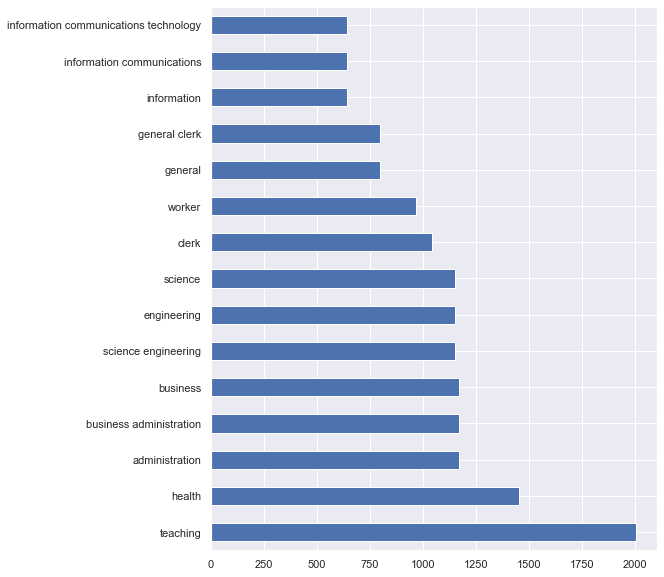

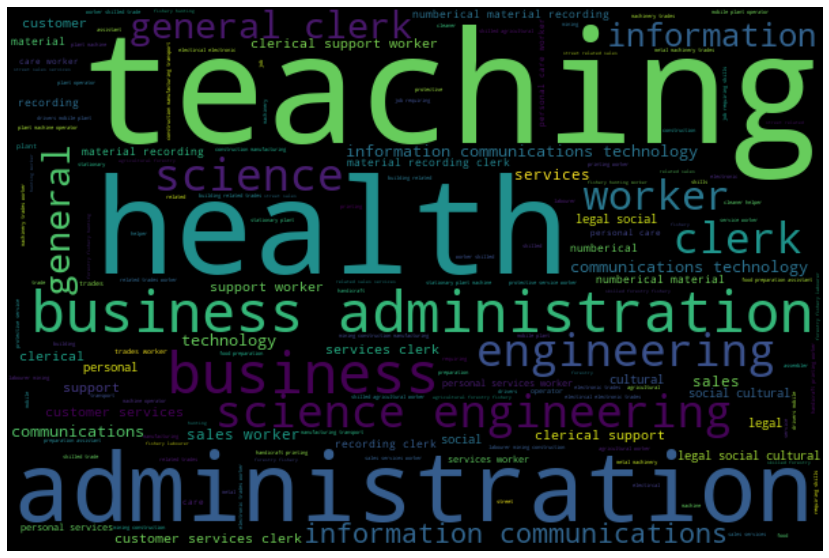

In [173]:
top_texts3 = trigrams_df.sum().sort_values(ascending=False)
top_texts3.head(15).plot(kind='barh')# Create and generate a word cloud image:
Cloud = WordCloud( width = 600, height = 400,
                background_color ='black',
                stopwords = 'English',
                min_font_size = 3,
                min_word_length=0).generate_from_frequencies(top_texts3)
# Display the generated image:
plt.figure(figsize=[15,10])
plt.imshow(Cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [174]:
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import re
import string

import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.collocations import *

In [160]:
text = data.job_description

In [162]:
def clean_words(text):
    
    #join all strings in text and separate them by white space
    joined_text = "".join(text) 
    
    #remove all characters that are not letters
    joined_text = re.sub('[^A-Za-z ]+', ' ', joined_text)
    
    #convert all words in list to their base form, or 'lemma'
    #words = [WordNetLemmatizer().lemmatize(word) for word in joined_text]
    
    #create a list of individual strings for each word in the text 
    words = word_tokenize(joined_text)
    
    clean_words_list = []
    
    for word in words:
            stopwords_list = stopwords.words('english')
            if len(word) > 2 and word not in stopwords_list:
        
                clean_words_list.append(word.lower())
    
    return clean_words_list

In [163]:
clean_words(data.job_description)

['teachinggeneral',
 'clerknumberical',
 'material',
 'recording',
 'clerklegal',
 'social',
 'culturalpersonal',
 'services',
 'workerinformation',
 'communications',
 'technologyscience',
 'engineeringscience',
 'engineeringteachinghealthnumberical',
 'material',
 'recording',
 'clerksales',
 'workerlegal',
 'social',
 'culturalscience',
 'engineeringhealthhealthscience',
 'engineeringlegal',
 'social',
 'culturalpersonal',
 'services',
 'workerpersonal',
 'care',
 'workerhealthscience',
 'engineeringscience',
 'engineeringinformation',
 'communications',
 'technologybusiness',
 'administrationpersonal',
 'services',
 'workerinformation',
 'communications',
 'technologyhealthpersonal',
 'services',
 'workercustomer',
 'services',
 'clerklegal',
 'social',
 'culturalsales',
 'workerteachinggeneral',
 'clerkcustomer',
 'services',
 'clerkinformation',
 'communications',
 'technologycustomer',
 'services',
 'clerkteachinghealthother',
 'clerical',
 'support',
 'workerother',
 'clerical'

In [164]:
#wordcloud = WordCloud().generate(clean_words)

Print Value:  ID AT                                            Teaching AT                                       General Clerk AT               Numberical   Material Recording Clerk AT                            Legal  Social   Cultural AT                            Personal Services Worker                                                        UK                       Other Clerical Support Worker UK                                              Health UK                                              Health UK                                              Health UK             Information   Communications Technology Name  job description  Length         dtype  object


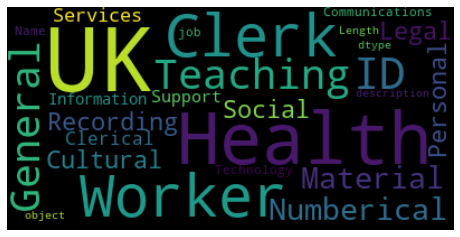

In [165]:
import re 

# Declared Variable as obj
str_to_replace = data.job_description

text_only = re.sub("[^a-zA-Z]", " ",str(str_to_replace))
print('Print Value: ', text_only) 

wordcloud = WordCloud().generate(text_only)

plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()